# Edge detection
### Canny filter
### Morphological operator
## Tasks
* Try different thresholds for binarization (lena)
* Apply skeletonize, erosion to bin images (lena,camera)
* Apply canny filter (lena, camera)


### Binarization

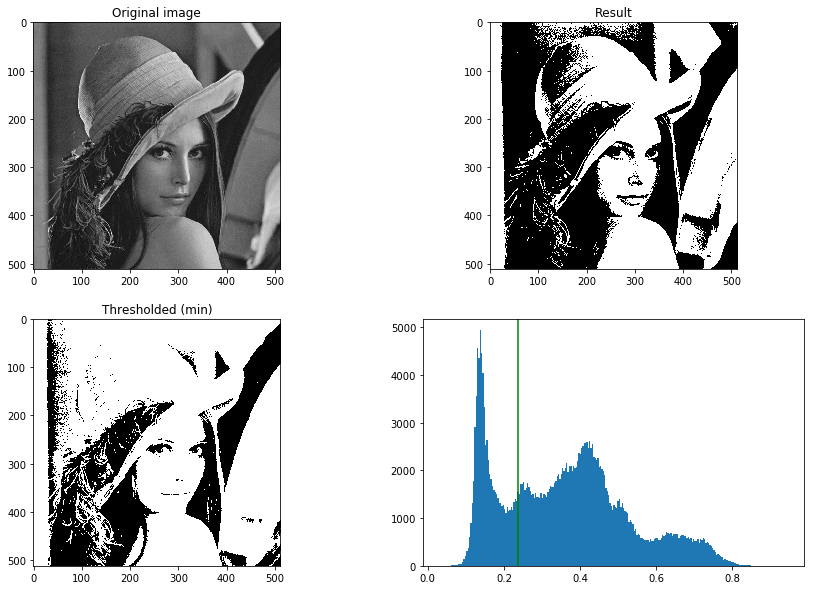

In [67]:
import os
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
from skimage.filters import threshold_local, threshold_minimum

image = io.imread(os.path.join(data_dir, "lena_cover.jpg"), as_grey=True)
tt = np.median(image)
binary = image > tt

thresh_min = threshold_minimum(image)
binary_min = image > thresh_min

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Result')

ax[2].imshow(binary_min, cmap=plt.cm.gray)
ax[2].set_title('Thresholded (min)')

ax[3].hist(image.ravel(), bins=256)
ax[3].axvline(thresh_min, color='g')

for a in ax:
    a.axis()

plt.show()

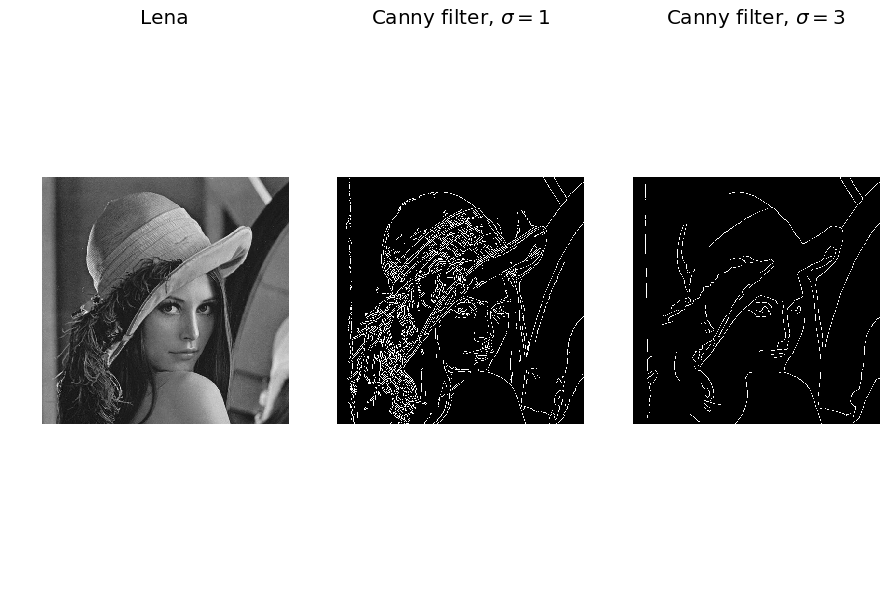

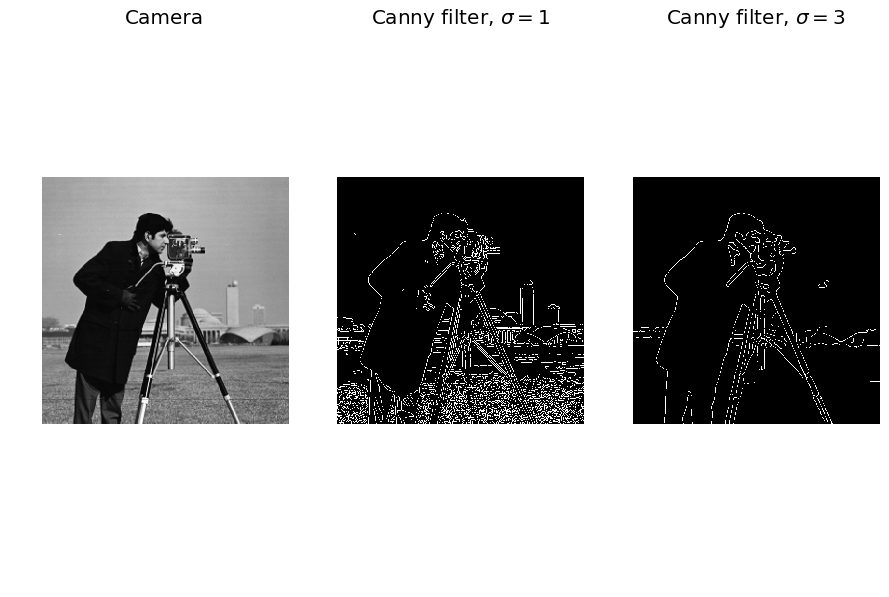

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import feature

im = io.imread(os.path.join(data_dir, "lena_cover.jpg"), as_grey=True)
camera = io.imread(os.path.join(data_dir, "camera.png"), as_grey=True)
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)
edges3 = feature.canny(camera)
edges4 = feature.canny(camera, sigma=3)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharex=True, sharey=True)
ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Lena', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig, (ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharex=True, sharey=True)
ax4.imshow(camera, cmap=plt.cm.gray)
ax4.axis('off')
ax4.set_title('Camera', fontsize=20)

ax5.imshow(edges3, cmap=plt.cm.gray)
ax5.axis('off')
ax5.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax6.imshow(edges4, cmap=plt.cm.gray)
ax6.axis('off')
ax6.set_title('Canny filter, $\sigma=3$', fontsize=20)

plt.show()

In [47]:
import os
import matplotlib.pyplot as plt
from skimage.data import data_dir
from skimage.util import img_as_ubyte
from skimage import io


def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax1.set_adjustable('box-forced')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    ax2.set_adjustable('box-forced')
    plt.show()

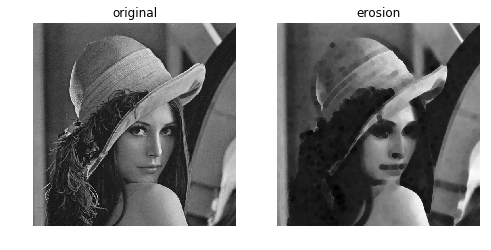

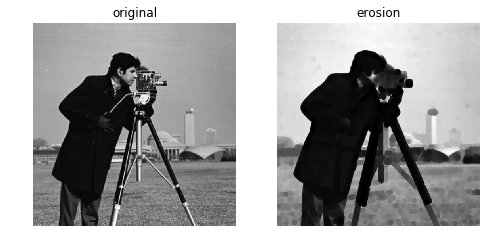

In [49]:
import os
from skimage import io
import matplotlib.pyplot as plt

from skimage.morphology import disk
from skimage.morphology import erosion, dilation, opening, closing
image = io.imread(os.path.join(data_dir, "lena_cover.jpg"), as_grey=True)
selem = disk(6)
eroded = erosion(image, selem)
plot_comparison(image, eroded, 'erosion')

camera = io.imread(os.path.join(data_dir, "camera.png"), as_grey=True)
selem = disk(6)
eroded = erosion(camera, selem)
plot_comparison(camera, eroded, 'erosion')


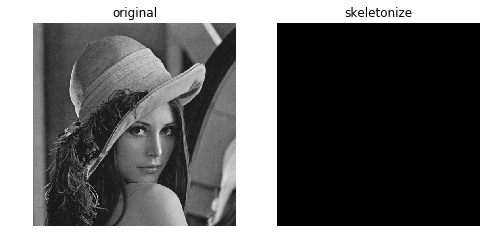

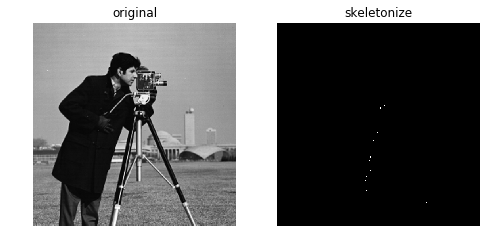

In [51]:
import os



from skimage import io
from skimage.data import data_dir
import matplotlib.pyplot as plt
from skimage.morphology import disk
from skimage.morphology import erosion, skeletonize, opening, closing
image = io.imread(os.path.join(data_dir, "lena_cover.jpg"), as_grey=True)
selem = disk(6)
sk = skeletonize(image == 0)
plot_comparison(image, sk, 'skeletonize')

camera = io.imread(os.path.join(data_dir, "camera.png"), as_grey=True)
selem = disk(6)
sk = skeletonize(camera == 0)
plot_comparison(camera, sk, 'skeletonize')

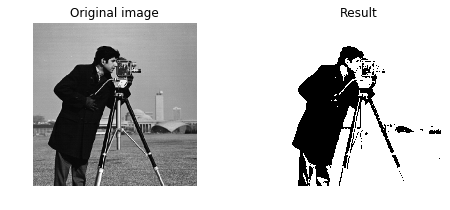

In [21]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
image = data.camera()
tt = np.median(image)
binary = image > 50

fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary, cmap=plt.cm.gray)
ax[1].set_title('Result')

for a in ax:
    a.axis('off')

plt.show()